In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Huggingface.utils import HuggingfaceDatasetManager, TransformersModelTypeEnum, ModelManager, get_most_important_n_tokens
from matplotlib import pyplot as plot

This project is written and tested in Python 3.7.13


In [3]:
# does not have a reference in the website: https://huggingface.co/elozano/bert-base-cased-fake-news
model_type = TransformersModelTypeEnum.EZ_BERT_BASE_CASED_FAKE_NEWS
model_manager = ModelManager(model_type)

Using device: cuda


## Load the respective dataset for the model

In [4]:
dataset_manager = HuggingfaceDatasetManager(model_type)

Loading instances from dir: /home/sersery/Desktop/TUM Informatik/SS22/Thesis/Code/Explainability_of_FND_Models/Huggingface/data/RobertaFakeNews/True.csv
Loaded 21417 instances from /home/sersery/Desktop/TUM Informatik/SS22/Thesis/Code/Explainability_of_FND_Models/Huggingface/data/RobertaFakeNews/True.csv
Loading instances from dir: /home/sersery/Desktop/TUM Informatik/SS22/Thesis/Code/Explainability_of_FND_Models/Huggingface/data/RobertaFakeNews/Fake.csv
Loaded 23481 instances from /home/sersery/Desktop/TUM Informatik/SS22/Thesis/Code/Explainability_of_FND_Models/Huggingface/data/RobertaFakeNews/Fake.csv


In [5]:
labels, samples = dataset_manager.fetch_random_samples(sample_count=200)

Getting the following indexes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]


In [6]:
shap_values_dict_list, explainer = model_manager.explain_texts(samples, visualize=False)

Token indices sequence length is longer than the specified maximum sequence length for this model (1081 > 512). Running this sequence through the model will result in indexing errors


Sample 0 is predicted Fake with score: 3.2826512779138284e-06
Sample 0 is predicted True with score: 0.9999966621398926
###################################################################
Sample 1 is predicted Fake with score: 3.2838850074767834e-06
Sample 1 is predicted True with score: 0.9999966621398926
###################################################################
Sample 2 is predicted Fake with score: 0.9999061822891235
Sample 2 is predicted True with score: 9.383650467498228e-05
###################################################################
Sample 3 is predicted Fake with score: 3.2660700526321307e-06
Sample 3 is predicted True with score: 0.9999967813491821
###################################################################
Sample 4 is predicted Fake with score: 0.9999961853027344
Sample 4 is predicted True with score: 3.7655831874872092e-06
###################################################################
Sample 5 is predicted Fake with score: 3.355974740770762e-06


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Partition explainer:  46%|████▌     | 92/200 [05:50<05:48,  3.22s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  60%|█████▉    | 119/200 [07:45<05:21,  3.97s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  60%|██████    | 120/200 [07:52<06:43,  5.04s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  71%|███████   | 142/200 [09:20<04:35,  4.74s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  88%|████████▊ | 175/200 [11:38<01:41,  4.08s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  98%|█████████▊| 196/200 [12:50<00:10,  2.63s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 201it [13:41,  4.17s/it]                         


Base values are: 0.9329918622970581 and  0.06700815260410309

--> "group" with shap value: 0.0001694960554548938

--> ", " with shap value: 0.0001694960554548938

--> "Lebanon " with shap value: 0.0001694960554548938

--> "PARIS " with shap value: 0.09242323157459863

--> "/" with shap value: 0.09242323157459863

--> "BEIRUT" with shap value: 0.09242323157459863

--> "" with shap value: 0.09242323157459863

--> ") " with shap value: 0.20429738679404508

--> "Reuters" with shap value: 0.20429738679404508

--> "(" with shap value: 0.20429738679404508

All 10 tokens are 0.9250693802035153% of all tokens.
Their cumulative importance is 0.9830935748468945.
This value shows that 99.68327380524374% of cumulative importance of all positive contributing tokens (0.9862171830026512) are these 10 tokens.

###################################################################


The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


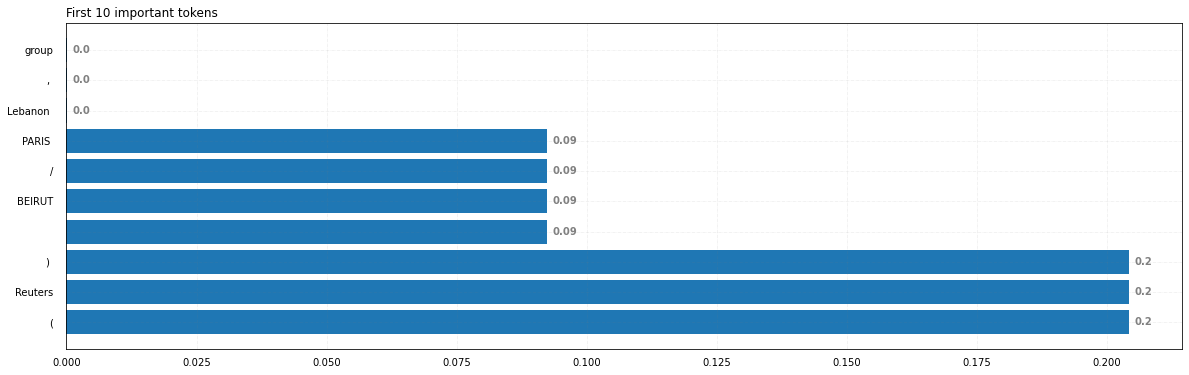

In [15]:
tokens, shap_values = get_most_important_n_tokens(shap_values_dict_list[0], labels.iloc[0], n=10)
fig, ax = plot.subplots(figsize=(20, 6))
ax.barh(tokens, shap_values)
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plot.text(i.get_width()+0.001, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('First 10 important tokens',
             loc ='left', )
# Show Plot
plot.show()

In [17]:
import shap
shap.text_plot(shap_values_dict_list[0])

In [7]:
for shap_values_dict in shap_values_dict_list:
    get_most_important_n_tokens(shap_values_dict, n=10)

Base values are: 0.9329918622970581 and  0.06700815260410309

--> "TOKYO " with shap value: 0.09413860327982419

--> "" with shap value: 0.09413860327982419

--> ") " with shap value: 0.24556923086483284

--> "Reuters" with shap value: 0.24556923086483284

--> "(" with shap value: 0.24556923086483284

All 5 tokens are 0.8417508417508418% of all tokens.
Their cumulative importance is 0.924984899154147.
This value shows that 92.36609933162175% of cumulative importance of all positive contributing tokens (1.0014333243987885) are these 5 tokens.

###################################################################
Base values are: 0.9939058423042297 and  0.006094164680689573

--> "GENEVA " with shap value: 0.13921448570102726

--> "" with shap value: 0.13921448570102726

--> ") " with shap value: 0.23885257363532353

--> "Reuters" with shap value: 0.23885257363532353

--> "(" with shap value: 0.23885257363532353

All 5 tokens are 1.7543859649122806% of all tokens.
Their cumulative importanc

## Problem with the model: Overlocalisation. Focus on one word rather than the whole context.